In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Create a DataFrame, ha_costs_df, from the mmd_heart_attack_data.csv file.  

In [2]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]

In [3]:
ha_costs_df= pd.read_csv('mmd_heart_attack_data.csv', na_values = missing_values)

Examine the first and last 5 rows 

In [4]:
ha_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [5]:
ha_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


In [6]:
ha_costs_df.state.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'PUERTO RICO'],
      dtype=object)

### Keep only the rows where facilities are in TN

In [7]:
ha_costs_df_TN = ha_costs_df.query('state == "TENNESSEE"')

In [8]:
ha_costs_df_TN.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661
2032,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,undefined,44423
2033,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,undefined,41240
2034,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,undefined,38968


In [9]:
#Print the dimensions of the data. How many TN counties are represented in the heart attack costs data?
ha_costs_df_TN.shape

(91, 17)

In [10]:
ha_costs_df_TN['county'].nunique()

91

In [11]:
#my_list = ['Urban', 'Rural']
#ha_costs_df_TN = ha_costs_df_TN.query("urban in @my_list")

In [12]:
#How many counties are classified as Urban? 
ha_costs_df_TN_urban = ha_costs_df_TN.query('urban == "Urban"')
ha_costs_df_TN_urban.shape

(38, 17)

In [13]:
#How many as Rural?
ha_costs_df_TN_rural = ha_costs_df_TN.query('urban == "Rural"')

In [14]:
ha_costs_df_TN.head(10)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661
2032,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,undefined,44423
2033,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,undefined,41240
2034,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,undefined,38968
2035,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47011,Bradley County,TENNESSEE,Urban,All,undefined,40068
2036,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47013,Campbell County,TENNESSEE,Rural,All,undefined,37715
2037,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47015,Cannon County,TENNESSEE,Urban,All,undefined,50604
2038,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47017,Carroll County,TENNESSEE,Rural,All,undefined,44771
2039,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47019,Carter County,TENNESSEE,Urban,All,undefined,45266


### There appears to be a difference in costs between Urban counties and Rural counties

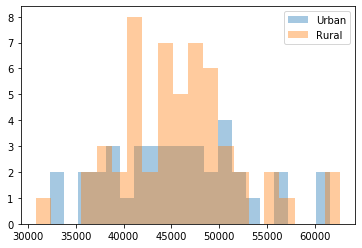

In [15]:
# Examine the distribution of costs (contained in the `analysis_value` column).
Urban=plt.hist(ha_costs_df_TN_urban['analysis_value'], alpha=0.4, bins=20, label='Urban')
Rural=plt.hist(ha_costs_df_TN_rural['analysis_value'], alpha=0.4, bins=20, label='Rural')
plt.legend()

#### Create a DataFrame, `cancer_costs_df`, from the `mmd_cancer_data.csv` file.

In [16]:
cancer_costs_df= pd.read_csv('mmd_cancer_data.csv', na_values = missing_values)

Look at the head and tail of the DataFrame

In [17]:
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [18]:
cancer_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


In [19]:
#Print the shape of the `cancer_costs_df`
cancer_costs_df.shape

(3165, 17)

### Keep only the rows where facilities are in TN

In [20]:
cancer_costs_df_TN=cancer_costs_df.query('state == "TENNESSEE"')

In [21]:
#Print the dimensions of the data. How many TN counties are represented in the cancer costs data?
cancer_costs_df_TN.shape

(95, 17)

In [22]:
cancer_costs_df_TN.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219
2398,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,undefined,21315
2399,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,undefined,19250
2400,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,undefined,17073


In [23]:
cancer_costs_df_TN['county'].nunique()

95

### The datasets have a different number of counties. Which counties are missing from one of the datasets?

In [24]:
cancer_costs_df_TN[~cancer_costs_df_TN.county.isin(ha_costs_df_TN.county)]

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2429,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47067,Hancock County,TENNESSEE,Rural,All,undefined,22515
2459,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47127,Moore County,TENNESSEE,Rural,All,undefined,16978
2464,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47137,Pickett County,TENNESSEE,Rural,All,undefined,16768
2483,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47175,Van Buren County,TENNESSEE,Rural,All,undefined,16244


No handles with labels found to put in legend.


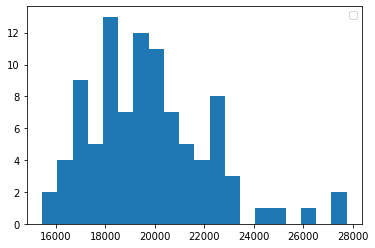

In [25]:
#Examine the distribution of costs.
plt.hist(cancer_costs_df_TN['analysis_value'], bins=20)
plt.legend()

### Create a DataFrame, `income_df`, from the IRS CSV file.

In [2]:
income_df=pd.read_csv("irs_county_2016.csv")

Keep only the data that pertains to Tennessee. 

In [3]:
 income_df_TN=income_df.query('STATE == "TN"')

In [4]:
#Look at the head and the tail 
income_df_TN.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [5]:
#Print the shape 
income_df_TN.shape

(768, 148)

In [6]:
#Keep only the following columns:  `['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']`  
income_df_TN_subset= income_df_TN.loc[income_df_TN['COUNTYNAME']== 'Tennessee',['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

In [7]:
income_df_TN = income_df_TN[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]
income_df_TN.head()

,STATE,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,N2,NUMDEP,ELDERLY,A00100,N02650,A02650,N02300,A02300
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


In [8]:
#rename those columns: `['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']`  
income_df_TN.columns=['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']



In [9]:
#check renamed columns
income_df_TN.columns

Index(['state', 'county', 'income_bucket', 'return_count', 'single_returns',
       'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents',
       'elderly', 'agi', 'returns_with_total_inc', 'total_inc_amt',
       'returns_with_unemployment', 'unemployment_comp'],
      dtype='object')

In [10]:
income_df_TN.head(10)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19757,TN,Tennessee,6,241730,43690,182110,12690,606940,183160,71640,20916820,241730,21167809,6350,21411
19758,TN,Tennessee,7,298270,33380,254300,8230,807590,255170,91150,39800165,298270,40397276,5490,20281
19759,TN,Tennessee,8,97920,8640,85910,1760,281650,97810,31990,50066256,97920,51122320,560,2401
19760,TN,Anderson County,1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,2,5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


In [11]:
income_df_TN.shape

(768, 15)

Create `income_dict`, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions 

In [12]:
income_dict = {0:'Total', 1: 'Under $1', 2: 'Between 1 and $10,000', 3: 'Between 10,000 and $25,000',
              4: 'Between 25,000 and $50,000', 5: 'Between 50,000 and $75,000', 
               6: 'Between 75,000 and $100,000', 7: 'Between 100,000 and $200,000', 
               8:'$200,000 or more'}

Pass the dictionary as an argument to the pandas `replace()` method to change the `income_bucket` column so that it uses descriptive text instead of the numeric code.

In [13]:
income_df_TN.income_bucket=income_df_TN.income_bucket.replace(income_dict)

In [14]:
income_df_TN.head(10)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19757,TN,Tennessee,"Between 75,000 and $100,000",241730,43690,182110,12690,606940,183160,71640,20916820,241730,21167809,6350,21411
19758,TN,Tennessee,"Between 100,000 and $200,000",298270,33380,254300,8230,807590,255170,91150,39800165,298270,40397276,5490,20281
19759,TN,Tennessee,"$200,000 or more",97920,8640,85910,1760,281650,97810,31990,50066256,97920,51122320,560,2401
19760,TN,Anderson County,Under $1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,"Between 1 and $10,000",5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


Use the pandas `groupby()` method to group the data by county and get the `sum()` of all numeric columns for that county. Be sure to also `reset_index()` so that our aggregated data is re-indexed to begin at 0. Save this as a DataFrame called `income_county_agg`, and look at the first few rows.

In [15]:
#Use the pandas `groupby()` method to group the data by county
#income_df_TN_subset_county = income_df_TN_subset.groupby('county') 

In [16]:
#re-indexed to begin at 0 and save as df income_county_agg
income_county_agg = income_df_TN.groupby('county').agg('sum').reset_index()
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


1. Write a for-loop to iterate through the `income_county_agg` DataFrame and create a list of average incomes for each county. Assign this list to a new column in `income_county_agg` called `avg_income`. 

In [28]:
#First create an empty list called `avg_inc_list` 
avg_inc_list = []

In [29]:
#Begin the for-loop to iterate through `income_county_agg` 
#Store the row's total income in a variable called `income`. Remember to multiply total income by 1000 before storing it in order to get the actual amount.
#Store each row's `return_count` in a variable called `count`.
#divide `income` by `count`, round it to the nearest whole number, and `append` it to `avg_inc_list`.
#Assign `avg_income_list` to a new column in `income_county_agg` called `avg_income`.
for index, row_values in income_county_agg.iterrows():
    income=income_county_agg['total_inc_amt']*1000
    count=income_county_agg['return_count']
    divide=income/count
    divide=divide.round()
    avg_inc_list.append(divide)
print(avg_inc_list)

[0      53382.0
1      47128.0
2      41297.0
3      39744.0
4      56786.0
5      48623.0
6      41813.0
7      44955.0
8      42632.0
9      40318.0
10     55352.0
11     43147.0
12     41508.0
13     35424.0
14     36106.0
15     48847.0
16     43052.0
17     48506.0
18     70778.0
19     43585.0
20     41330.0
21     51071.0
22     47019.0
23     68950.0
24     39765.0
25     50610.0
26     44305.0
27     45660.0
28     42900.0
29     42501.0
        ...   
66     40962.0
67     41791.0
68     45798.0
69     43798.0
70     52185.0
71     44420.0
72     55389.0
73     52259.0
74     55960.0
75     37348.0
76     47466.0
77     44244.0
78     59872.0
79     50772.0
80     44939.0
81     52747.0
82     68528.0
83     59264.0
84     50067.0
85     44463.0
86     43004.0
87     41821.0
88     39591.0
89     40390.0
90     55624.0
91     42557.0
92     44527.0
93     40297.0
94    129769.0
95     67411.0
Length: 96, dtype: float64, 0      53382.0
1      47128.0
2      41297.0
3      3974